## Imports

In [1]:
# Main imports
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import plotly.graph_objects as go


# sklearn models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline


# Other relevant imports
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pd.set_option('max_rows',None)
%matplotlib inline
sns.set()

In [2]:
# Loading the necessary datasets
df = pd.read_csv('../data/df_clean.csv')
#XXX = pd.read_csv('./data/XXXX.csv')
#XXX = pd.read_csv('./data/XXX.csv')

In [3]:
df.head().T

0                  1  \
ID                              158023              20801   
Name                          L. Messi  Cristiano Ronaldo   
Age                                 31                 33   
Nationality                  Argentina           Portugal   
Overall                             94                 94   
Potential                           94                 94   
Club                      FC Barcelona           Juventus   
Value                        1.105e+08            7.7e+07   
Wage                            565000             405000   
Preferred Foot                    Left              Right   
International Reputation             5                  5   
Weak Foot                            4                  4   
Skill Moves                          4                  5   
Work Rate                       Medium               High   
Body Type                         Lean             Stocky   
Position                            RF                 ST   
Contract Expiration               2021               2022   
Height                             5'7                6'2   
Weight                          159lbs             183lbs   
Crossing                            84                 84   
Finishing                           95                 94   
HeadingAccuracy                     70                 89   
ShortPassing                        90                 81   
Volleys                             86                 87   
Dribbling                           97                 88   
Curve                               93                 81   
FKAccuracy                          94                 76   
LongPassing                         87                 77   
BallControl                         96                 94   
Acceleration                        91                 89   
SprintSpeed                         86                 91   
Agility                             91                 87   
Reactions                           95                 96   
Balance                             95                 70   
ShotPower                           85                 95   
Jumping                             68                 95   
Stamina                             72                 88   
Strength                            59                 79   
LongShots                           94                 93   
Aggression                          48                 63   
Interceptions                       22                 29   
Positioning                         94                 95   
Vision                              94                 82   
Penalties                           75                 85   
Composure                           96                 95   
Marking                             33                 28   
StandingTackle                      28                 31   
SlidingTackle                       26                 23   
GKDiving                             6                  7   
GKHandling                          11                 11   
GKKicking                           15                 15   
GKPositioning                       14                 14   
GKReflexes                           8                 11   

                                            2                  3  \
ID                                     190871             193080   
Name                                Neymar Jr             De Gea   
Age                                        26                 27   
Nationality                            Brazil              Spain   
Overall                                    92                 91   
Potential                                  93                 93   
Club                      Paris Saint-Germain  Manchester United   
Value                               1.185e+08            7.2e+07   
Wage                                   290000             260000   
Preferred Foot                          Right              Rig

In [4]:
#df.dtypes

In [5]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Expiration', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

### Pre-Processing

### Feature Engineering

In [6]:
# Categorize players' positions 
# Adapted from Nitin Datta

def main_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'FB'
    elif ((df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') ):
        return 'CB'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'CDM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'RM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'WING'
    elif ((df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') ):
        return 'CM'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') ):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

In [7]:
df['Main Position'] = df.apply(main_position,axis = 1)

In [8]:
df['Main Position'].unique()

array(['ST', 'WING', 'GK', 'CM', 'CB', 'CDM', 'AM', 'FB'], dtype=object)

In [9]:
# Binarize Preferred Foot
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: 1 if x  == 'Right' else 0)

In [10]:
df.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Preferred Foot  ...  Composure  \
0         FC Barcelona  110500000.0  565000.0               0  ...       96.0   
1             Juventus   77000000.0  405000.0               1  ...       95.0   
2  Paris Saint-Germain  118500000.0  290000.0               1  ...       94.0   
3    Manchester United   72000000.0  260000.0               1  ...       68.0   
4      Manchester City  102000000.0  355000.0               1  ...       88.0   

   Marking  StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
0     33.0            28.0          26.0      6.0       11.0       15.0   
1     28.0            31.0          23.0      7.0       11.0       15.0   
2     27.0            24.0          33.0      9.0        9.0       15.0   
3     15.0            21.0          13.0     90.0       85.0       87.0   
4     68.0            58.0          51.0     15.0       13.0        5.0   

  GKPositioning GKReflexes  Main Position  
0          14.0        8.0             ST  
1          14.0       11.0             ST  
2          15.0       11.0           WING  
3          88.0       94.0             GK  
4          10.0       13.0             CM  

[5 rows x 54 columns]

In [11]:
#df.to_csv('../data/df_rs3.csv', index=False)

In [12]:
#df1 = df.copy()

In [13]:
category = df.select_dtypes(include = 'object').columns

In [14]:
category

Index(['Name', 'Nationality', 'Club', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Main Position'],
      dtype='object')

#### Getting the features with correlation of >0.20

In [15]:
high_corr = (abs(df.corr()[['Value']])>0.20)['Value']
high_corr

ID                          False
Age                         False
Overall                      True
Potential                    True
Value                        True
Wage                         True
Preferred Foot              False
International Reputation     True
Weak Foot                   False
Skill Moves                  True
Contract Expiration          True
Crossing                     True
Finishing                    True
HeadingAccuracy             False
ShortPassing                 True
Volleys                      True
Dribbling                    True
Curve                        True
FKAccuracy                   True
LongPassing                  True
BallControl                  True
Acceleration                False
SprintSpeed                 False
Agility                     False
Reactions                    True
Balance                     False
ShotPower                    True
Jumping                     False
Stamina                      True
Strength      

In [16]:
corr_20 = df.corr()[['Value']][high_corr].index
corr_20

Index(['Overall', 'Potential', 'Value', 'Wage', 'International Reputation',
       'Skill Moves', 'Contract Expiration', 'Crossing', 'Finishing',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Reactions', 'ShotPower', 'Stamina',
       'LongShots', 'Positioning', 'Vision', 'Penalties', 'Composure'],
      dtype='object')

### Heatmap for Numerical Variables

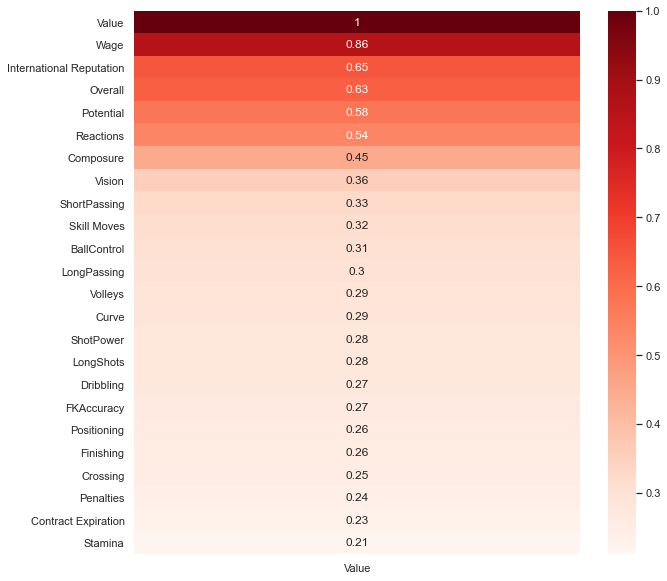

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['Value']].sort_values('Value', ascending=False).head(24), annot=True, cmap='Reds');

### Dummify Categorical Variables

In [18]:
df_cat = pd.get_dummies(df[['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Main Position']])

In [19]:
df_cat_heatmap = pd.concat([df.Value, df_cat], axis = 1)

### Heatmap for Categorical Features

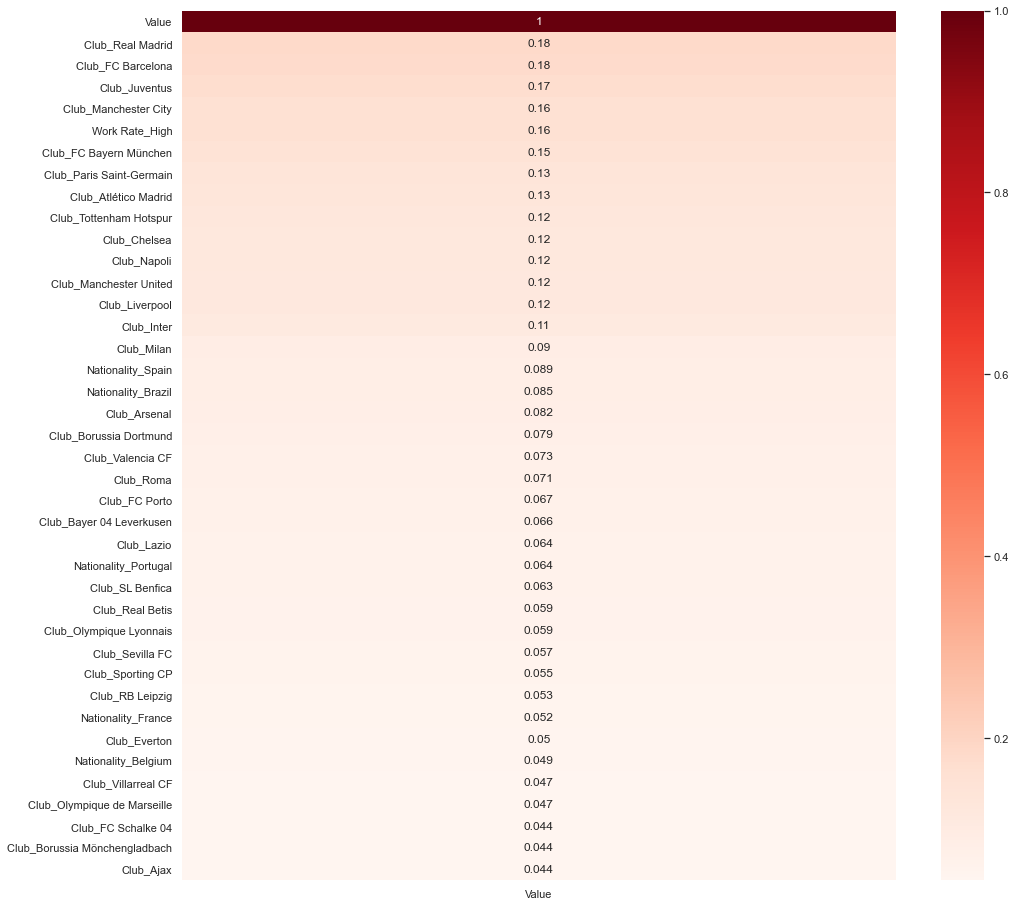

In [20]:
plt.figure(figsize=(16,16))
sns.heatmap(df_cat_heatmap.corr()[['Value']].sort_values('Value', ascending=False).head(40), annot=True, cmap='Reds');

As seen from the heatmap above, the clubs with the highest correlation to a players' value are Real Madrid, Barcelona, Juventus. For work rate, the highest correlations are High/High and High/Medium. As for nationality, players from Spain or Brazil have the highest correlation with value.

## Modeling

For the modeling process, i am going to try out different models to see which model give the best score on unseen data. I will then select the best model and fit it.

The 4 models i will be testing are:
#### (1) Linear Regression
#### (2) Lasso Regression
#### (3) Ridge Regression
#### (4) Random Forest Regression

Firstly, i will assess the baseline score.

In [21]:
# baseline accuracy
print("Baseline Accuracy:", df["Value"].mean())

Baseline Accuracy: 2410695.8861976163


I will take numerical features with >0.2 correlation with the target (Value) and categorical features to test the models.

In [22]:
df_num = df[['ID', 'Wage', 'International Reputation', 'Overall', 'Potential', 'Reactions', 'Composure', 'Vision',
         'ShortPassing', 'Skill Moves', 'BallControl', 'LongPassing', 'Volleys', 'Curve', 'ShotPower',
         'LongShots', 'Dribbling', 'FKAccuracy', 'Positioning', 'Finishing', 'Crossing', 'Penalties', 
          'Contract Expiration', 'Stamina']]

In [23]:
df2 = pd.concat([df_num, df_cat], axis = 1)

In [24]:
df2.head()

ID      Wage  International Reputation  Overall  Potential  Reactions  \
0  158023  565000.0                       5.0       94         94       95.0   
1   20801  405000.0                       5.0       94         94       96.0   
2  190871  290000.0                       5.0       92         93       94.0   
3  193080  260000.0                       4.0       91         93       90.0   
4  192985  355000.0                       4.0       91         92       91.0   

   Composure  Vision  ShortPassing  Skill Moves  ...  Body Type_Normal  \
0       96.0    94.0          90.0          4.0  ...                 0   
1       95.0    82.0          81.0          5.0  ...                 0   
2       94.0    87.0          84.0          5.0  ...                 0   
3       68.0    68.0          50.0          1.0  ...                 0   
4       88.0    94.0          92.0          4.0  ...                 1   

   Body Type_Stocky  Main Position_AM  Main Position_CB  Main Position_CDM  \
0                 0                 0                 0                  0   
1                 1                 0                 0                  0   
2                 0                 0                 0                  0   
3                 0                 0                 0                  0   
4                 0                 0                 0                  0   

   Main Position_CM  Main Position_FB  Main Position_GK  Main Position_ST  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 0   
3                 0                 0                 1                 0   
4                 1                 0                 0                 0   

   Main Position_WING  
0                   0  
1                   0  
2                   1  
3                   0  
4                   0  

[5 rows x 855 columns]

In [25]:
#df1 = df.drop(columns = 'Value')
X = df2
y = df['Value']
#X_val =

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_val = X_test.copy()

In [28]:
X_train.drop(['ID'], axis=1, inplace=True)
X_test.drop(['ID'], axis=1, inplace=True)

In [29]:
X_test.head()

Wage  International Reputation  Overall  Potential  Reactions  \
5848    8000.0                       1.0       69         77       66.0   
14634   2000.0                       1.0       61         61       53.0   
11807   3000.0                       1.0       64         68       53.0   
5826   18000.0                       1.0       69         69       66.0   
1989   24000.0                       1.0       75         80       69.0   

       Composure  Vision  ShortPassing  Skill Moves  BallControl  ...  \
5848        41.0    42.0          33.0          1.0         24.0  ...   
14634       60.0    43.0          48.0          2.0         56.0  ...   
11807       42.0    13.0          25.0          1.0         16.0  ...   
5826        73.0    66.0          69.0          2.0         69.0  ...   
1989        68.0    79.0          74.0          3.0         75.0  ...   

       Body Type_Normal  Body Type_Stocky  Main Position_AM  Main Position_CB  \
5848                  1                 0                 0                 0   
14634                 1                 0                 0                 0   
11807                 1                 0                 0                 0   
5826                  0                 0                 0                 1   
1989                  1                 0                 0                 0   

       Main Position_CDM  Main Position_CM  Main Position_FB  \
5848                   0                 0                 0   
14634                  0                 0                 0   
11807                  0                 0                 0   
5826                   0                 0                 0   
1989                   1                 0                 0   

       Main Position_GK  Main Position_ST  Main Position_WING  
5848                  1                 0                   0  
14634                 0                 1                   0  
11807                 1                 0                   0  
5826                  0                 0                   0  
1989                  0                 0                   0  

[5 rows x 854 columns]

In [30]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [31]:
X_train_scaled[:2, :2]

array([[-0.35841632, -0.29551156],
       [-0.4048643 , -0.29551156]])

In [32]:
X_test_scaled[:2, :2]

array([[-0.07972846, -0.29551156],
       [-0.35841632, -0.29551156]])

#### Linear Regression

In [33]:
# Linear Regression
lr = LinearRegression()
lr_cv_train = cross_val_score(lr, X_train_scaled, y_train, cv=5).mean()
lr_cv_train

-5.141149254632236e+25

In [34]:
lr_cv_test = cross_val_score(lr, X_test_scaled, y_test, cv=5).mean()
lr_cv_test

-2.0420590434240957e+26

In [35]:
lr_cv_var = lr_cv_train - lr_cv_test
lr_cv_var

1.5279441179608721e+26

#### Lasso CV

In [36]:
lasso = LassoCV(cv=5)
lasso_cv_train = cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean()
lasso_cv_train

0.8113701917887127

In [37]:
lasso_cv_test = cross_val_score(lasso, X_test_scaled, y_test, cv=5).mean()
lasso_cv_test

0.8123813662146457

In [38]:
lasso_cv_var = lasso_cv_train - lasso_cv_test
lasso_cv_var

-0.0010111744259330147

#### Ridge CV

In [39]:
ridge = RidgeCV()
ridge_cv_train = cross_val_score(ridge, X_train_scaled, y_train, cv=5).mean()
ridge_cv_train

0.8102050487691204

In [40]:
ridge_cv_test = cross_val_score(ridge, X_test_scaled, y_test, cv=5).mean()
ridge_cv_test

0.8130673897116705

In [41]:
ridge_cv_var = ridge_cv_train - ridge_cv_test
ridge_cv_var

-0.0028623409425501123

#### Random Forest

In [42]:
#rf = RandomForestRegressor(n_estimators=150,random_state=42)
rf = RandomForestRegressor(random_state=42)
rf_cv_train = cross_val_score(rf, X_train_scaled, y_train, cv=5).mean()
rf_cv_train 

0.959892639666462

In [43]:
rf_cv_test = cross_val_score(rf, X_test_scaled, y_test, cv=5).mean()
rf_cv_test

0.9531416142627247

In [44]:
rf_cv_var = rf_cv_train - rf_cv_test
rf_cv_var

0.006751025403737287

In [45]:
# Create a df to compare results between models
model_comparison = pd.DataFrame([[lasso_cv_train , ridge_cv_train , rf_cv_train],
                              [lasso_cv_test , ridge_cv_test, rf_cv_test],
                              [lasso_cv_var, ridge_cv_var, rf_cv_var]],
                              columns = ["Lasso Regression", "Ridge Regression","Random Forest"], 
                              index=["Train Score", "Accuracy Score", "Variance"])
model_comparison

Lasso Regression  Ridge Regression  Random Forest
Train Score             0.811370          0.810205       0.959893
Accuracy Score          0.812381          0.813067       0.953142
Variance               -0.001011         -0.002862       0.006751

The above shows a rough illustration of how the models would perform on unrecognised data as they have not been fitted yet. Linear regression is clearly not suitable as it generates a negative train and test score so it is excluded from the table. Lasso and Ridge regression have very close scores but Random Forest produces the best results with the highest accuracy score and lowest variance.

## Evaluating Best Model - Random Forest

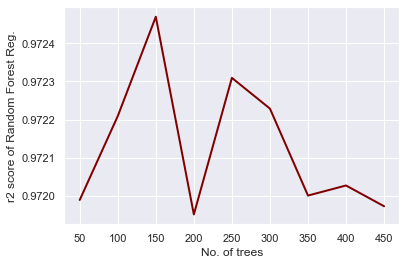

In [46]:
# Finding out the optimal number of trees for Random Forest Regression
# Adapted from aninditakarmakar


forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    rf = RandomForestRegressor(n_estimators=i,random_state=42)
    rf.fit(X_train_scaled,y_train)
    pred_rf  = rf.predict(X_test_scaled)
    scores_list.append(r2_score(y_test,pred_rf))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()

As shown above, the best estimator is at n = 150 trees.

### Random Forest

### Using best params

In [84]:
rf = RandomForestRegressor(n_estimators=150,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [85]:
# Generating score
train_rf = rf.score(X_train_scaled, y_train)
print(f'Random Forest Train Score:', train_rf)

accuracy_rf = rf.score(X_test_scaled, y_test)
print(f'Random Forest Accuracy Score:', accuracy_rf)

var_rf = train_rf - accuracy_rf
print(f'Random Forest Variance:', var_rf)

crossval_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5).mean()
print(f'Random Forest Cross Validation Score:', crossval_rf)

Random Forest Train Score: 0.9946033012608357
Random Forest Accuracy Score: 0.9724695770746812
Random Forest Variance: 0.022133724186154558
Random Forest Cross Validation Score: 0.9603803418408884


### Predicting Player's Value

In [88]:
rf_pred = rf.predict(X_test_scaled)
rf_pred[1:10]

array([ 192466.66666667,  413833.33333333,  669966.66666667,
       8696666.66666667, 4776000.        ,  348500.        ,
        478800.        ,  396900.        ,  830500.        ])

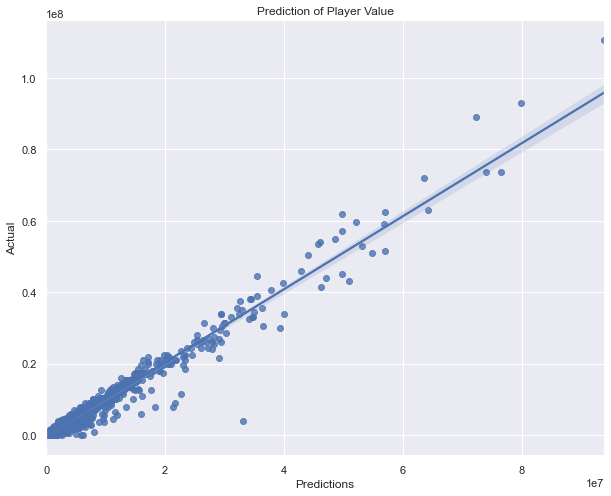

In [89]:
#Visualising the results
plt.figure(figsize=(10,8))
sns.regplot(rf_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Prediction of Player Value")
plt.show()

In [90]:
id_col = pd.DataFrame(X_val.iloc[:,0])
rf_preds = pd.DataFrame(rf_pred)

In [91]:
id_col = id_col.reset_index(drop=True)

In [92]:
#id_col.head(10)

In [93]:
#rf_preds.head(10)

In [94]:
#rf_preds.values/1000

In [95]:
prediction_df = pd.concat([id_col, rf_preds], axis=1)
prediction_df.rename(columns={0: 'Value'}, inplace=True)
prediction_df.head(10)

ID         Value
0  229692  1.181500e+06
1  239605  1.924667e+05
2  214981  4.138333e+05
3  189235  6.699667e+05
4  204497  8.696667e+06
5  237631  4.776000e+06
6  244538  3.485000e+05
7  189839  4.788000e+05
8  226416  3.969000e+05
9  217758  8.305000e+05

Now lets try to match the prediction of some players and compare it against the actual values!

In [96]:
df[df['ID'] == 229692]

ID     Name  Age Nationality  Overall  Potential             Club  \
5848  229692  J. Huth   24     Germany       69         77  1. FSV Mainz 05   

          Value    Wage  Preferred Foot  ...  Composure  Marking  \
5848  1200000.0  8000.0               1  ...       41.0     22.0   

      StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
5848            14.0          11.0     70.0       65.0       74.0   

     GKPositioning GKReflexes  Main Position  
5848          66.0       72.0             GK  

[1 rows x 54 columns]

For J.Huth (ID 229692), the predicted value is 1.18m euros while the actual value is 1.2m euroes.

In [97]:
df[df['ID'] == 217758]

ID           Name  Age       Nationality  Overall  Potential  \
9489  217758  C. Washington   26  Northern Ireland       66         69   

                  Club     Value    Wage  Preferred Foot  ...  Composure  \
9489  Sheffield United  825000.0  5000.0               1  ...       60.0   

      Marking  StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
9489     46.0            28.0          27.0     12.0       10.0        7.0   

     GKPositioning GKReflexes  Main Position  
9489           8.0       14.0             ST  

[1 rows x 54 columns]

For C. Washington (ID 217758), the predicted value is 825k euros while the actual value is 831k euroes.

In [98]:
df[df['ID'] == 204497]

ID       Name  Age Nationality  Overall  Potential  \
1989  204497  K. Stöger   24     Austria       75         80   

                    Club      Value     Wage  Preferred Foot  ...  Composure  \
1989  Fortuna Düsseldorf  9000000.0  24000.0               0  ...       68.0   

      Marking  StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
1989     38.0            29.0          35.0     15.0       12.0       13.0   

     GKPositioning GKReflexes  Main Position  
1989          10.0       12.0            CDM  

[1 rows x 54 columns]

### Residuals

Now let's plot the residuals to see how well the model has done.

In [99]:
residuals = y_test - rf_pred
residuals[:7]

5848      18500.000000
14634     77533.333333
11807    -13833.333333
5826     105033.333333
1989     303333.333333
3411     124000.000000
13263    -23500.000000
Name: Value, dtype: float64

Text(0.5, 1.0, 'Residual Distribution')

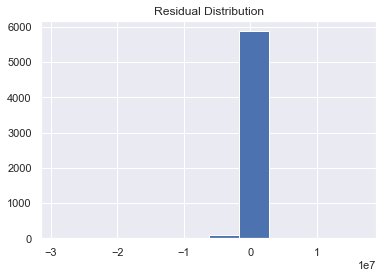

In [100]:
plt.hist(residuals)
plt.title('Residual Distribution')

In [39]:
#plt.hist(np.log(y_test))
#plt.title('Transformed Residuals')


In [102]:
sample_value = y_test.values[0]
np.log(sample_value)

13.997832114758229

In [103]:
np.log(y_test).values.min()

-inf

Text(0.5, 1.0, 'Residuals vs Predictions')

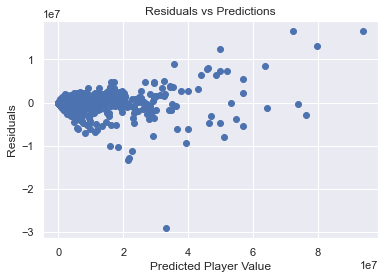

In [104]:
plt.scatter(x=rf_pred, y=residuals)
plt.xlabel('Predicted Player Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')

### Feature Importance

In [181]:
#https://mljar.com/blog/feature-importance-in-random-forest/

In [37]:
#len(rf.feature_importances_)

In [38]:
#rf.feature_importances_

## Conclusion

In conclusion,
